# This notebook check gender classifier at different depth of conv layer

In [1]:

import tensorflow as tf

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.13.0


In [2]:
from os import chdir
chdir("../")   # only run this ones else error will occur


In [1]:
import numpy as np

from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from IPython.display import clear_output

from datetime import datetime

In [11]:
X_train_l = np.load('private/npy/X_train_gender.npy')
X_test_l = np.load('private/npy/X_test_gender.npy')
y_train_l = np.load('private/npy/y_train_gender.npy')
y_test_l = np.load('private/npy/y_test_gender.npy')

In [ ]:
# Select 25% of the data randomly
num_samples_train = int(0.25 * len(X_train_l))
num_samples_test = int(0.25 * len(X_test_l))

# Randomly select indices
indices_train = np.random.choice(len(X_train_l), num_samples_train, replace=False)
indices_test = np.random.choice(len(X_test_l), num_samples_test, replace=False)

# Select data based on random indices
X_train_l = X_train_l[indices_train]
y_train_l = y_train_l[indices_train]
X_test_l = X_test_l[indices_test]
y_test_l = y_test_l[indices_test]

In [2]:
def create_model(depth):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 130, 1)))
    model.add(layers.MaxPooling2D((2, 2)))

    for _ in range(depth):  
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


    return model


In [3]:
model=create_model(1)


2024-03-16 23:04:08.942748: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-16 23:04:08.942885: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-16 23:04:08.942895: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-16 23:04:08.943508: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-16 23:04:08.943854: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 128, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 64, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 62, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 31, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 59520)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [44]:
def create_model(depth):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 130, 1)))
    print("Layer 1 - Conv2D Output Shape:", model.output_shape)  # Print size after first layer
    model.add(layers.MaxPooling2D((2, 2)))

    for i in range(depth):
        model.add(layers.Conv2D(124, (3, 3), activation='relu'))
        print(f"Layer {i+2} - Conv2D Output Shape:", model.output_shape)  # Print size after each Conv2D layer
        model.add(layers.MaxPooling2D((2, 2)))
        print(f"Layer {i+2} - MaxPooling2D Output Shape:", model.output_shape)  # Print size after each MaxPooling2D layer

    model.add(layers.Flatten())
    print("Layer FLATTEN Output Shape:", model.output_shape)  # Print size after flattening layer
    model.add(layers.Dense(128, activation='relu'))
    print("Layer DENSE Output Shape:", model.output_shape)  # Print size after dense layer
    model.add(layers.Dense(2, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [48]:
def create_model(depth):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 130, 1)))
    print("Layer 1 - Conv2D Output Shape:", model.output_shape)  # Print size after first layer
    print("Padding:", model.layers[-1].padding)
    print("Stride:", model.layers[-1].strides)
    model.add(layers.MaxPooling2D((2, 2)))
    print("Layer 2 - MaxPooling2D Output Shape:", model.output_shape)  # Print size after first MaxPooling2D layer
    print("Pool Size:", model.layers[-1].pool_size)

    for i in range(depth):
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        print(f"Layer {i+2} - Conv2D Output Shape:", model.output_shape)  # Print size after each Conv2D layer
        print("Padding:", model.layers[-1].padding)
        print("Stride:", model.layers[-1].strides)
        model.add(layers.MaxPooling2D((2, 2)))
        print(f"Layer {i+2} - MaxPooling2D Output Shape:", model.output_shape)  # Print size after each MaxPooling2D layer
        print("Pool Size:", model.layers[-1].pool_size)

    model.add(layers.Flatten())
    print("Layer FLATTEN Output Shape:", model.output_shape)  # Print size after flattening layer
    model.add(layers.Dense(128, activation='relu'))
    print("Layer DENSE Output Shape:", model.output_shape)  # Print size after dense layer
    model.add(layers.Dense(2, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Example usage
depth = 3  # You can adjust the depth as needed
model = create_model(depth)


Layer 1 - Conv2D Output Shape: (None, 126, 128, 64)
Padding: valid
Stride: (1, 1)
Layer 2 - MaxPooling2D Output Shape: (None, 63, 64, 64)
Pool Size: (2, 2)
Layer 2 - Conv2D Output Shape: (None, 61, 62, 64)
Padding: valid
Stride: (1, 1)
Layer 2 - MaxPooling2D Output Shape: (None, 30, 31, 64)
Pool Size: (2, 2)
Layer 3 - Conv2D Output Shape: (None, 28, 29, 64)
Padding: valid
Stride: (1, 1)
Layer 3 - MaxPooling2D Output Shape: (None, 14, 14, 64)
Pool Size: (2, 2)
Layer 4 - Conv2D Output Shape: (None, 12, 12, 64)
Padding: valid
Stride: (1, 1)
Layer 4 - MaxPooling2D Output Shape: (None, 6, 6, 64)
Pool Size: (2, 2)
Layer FLATTEN Output Shape: (None, 2304)
Layer DENSE Output Shape: (None, 128)


In [45]:
model = create_model(4)

Layer 1 - Conv2D Output Shape: (None, 126, 128, 64)
Layer 2 - Conv2D Output Shape: (None, 61, 62, 124)
Layer 2 - MaxPooling2D Output Shape: (None, 30, 31, 124)
Layer 3 - Conv2D Output Shape: (None, 28, 29, 124)
Layer 3 - MaxPooling2D Output Shape: (None, 14, 14, 124)
Layer 4 - Conv2D Output Shape: (None, 12, 12, 124)
Layer 4 - MaxPooling2D Output Shape: (None, 6, 6, 124)
Layer 5 - Conv2D Output Shape: (None, 4, 4, 124)
Layer 5 - MaxPooling2D Output Shape: (None, 2, 2, 124)
Layer FLATTEN Output Shape: (None, 496)
Layer DENSE Output Shape: (None, 128)


In [43]:
model = create_model(5)

Layer 1 - Conv2D Output Shape: (None, 126, 128, 64)
Layer 2 - Conv2D Output Shape: (None, 61, 62, 64)
Layer 2 - MaxPooling2D Output Shape: (None, 30, 31, 64)
Layer 3 - Conv2D Output Shape: (None, 28, 29, 64)
Layer 3 - MaxPooling2D Output Shape: (None, 14, 14, 64)
Layer 4 - Conv2D Output Shape: (None, 12, 12, 64)
Layer 4 - MaxPooling2D Output Shape: (None, 6, 6, 64)
Layer 5 - Conv2D Output Shape: (None, 4, 4, 64)
Layer 5 - MaxPooling2D Output Shape: (None, 2, 2, 64)


ValueError: Exception encountered when calling layer "conv2d_110" (type Conv2D).

Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_110/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_110/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [3,3,64,64].

Call arguments received by layer "conv2d_110" (type Conv2D):
  • inputs=tf.Tensor(shape=(None, 2, 2, 64), dtype=float32)

In [24]:
def train_models(depths, epochs,iterations):
    T1=datetime.now()
    index=0  #used in "Estimated Time Required :" to keep time record

    validation_accuracies = []
    for i in range(iterations):

        validation_accuracie=[]
        for depth in depths:
            print("Iteration :",i+1)
            print("Training model of depth :",depth)
            t1=datetime.now()   


            # Create model
            model = create_model(depth)
            # Train model
            history = model.fit(X_train_l, y_train_l, epochs=epochs, validation_data=(X_test_l, y_test_l), batch_size=64,verbose=1)
            # Record validation accuracy
            validation_accuracie.append(history.history['val_accuracy'])


            t2=datetime.now()   
            clear_output(wait=False)

            index+=1
            print("Estimated Time Required :",int((t2-t1).seconds)*((len(depths)*iterations)-index)/60," min")

        validation_accuracies.append(validation_accuracie)

    T2=datetime.now()
    clear_output(wait=False)
    print("Time taken :",(T2-T1).seconds,"s")

    return validation_accuracies


In [ ]:
depths = [5] 
epochs = 10
iteration=25

# Train models and save validation accuracies
validation_accuracies=train_models(depths, epochs,iteration)


In [9]:
combined_array = np.array(validation_accuracies)

In [ ]:
combined_array

In [10]:
column_averages = np.mean(combined_array, axis=0)

# Print the average of each column
print("Average of each column:", column_averages)

Average of each column: [[0.57524126 0.59587355 0.6266223  0.65317804 0.64246257 0.65584027
  0.65650583 0.65610649 0.67673877 0.681797  ]
 [0.51321131 0.54009984 0.53950083 0.57158069 0.58795341 0.61410981
  0.63274543 0.66775374 0.64126456 0.6899168 ]
 [0.53863561 0.58835275 0.61783694 0.63727122 0.67467554 0.70442595
  0.74262894 0.76219633 0.77264559 0.79307819]
 [0.58349418 0.59347754 0.61916805 0.67860233 0.71620632 0.75880199
  0.77970049 0.80772046 0.84579035 0.8604326 ]]


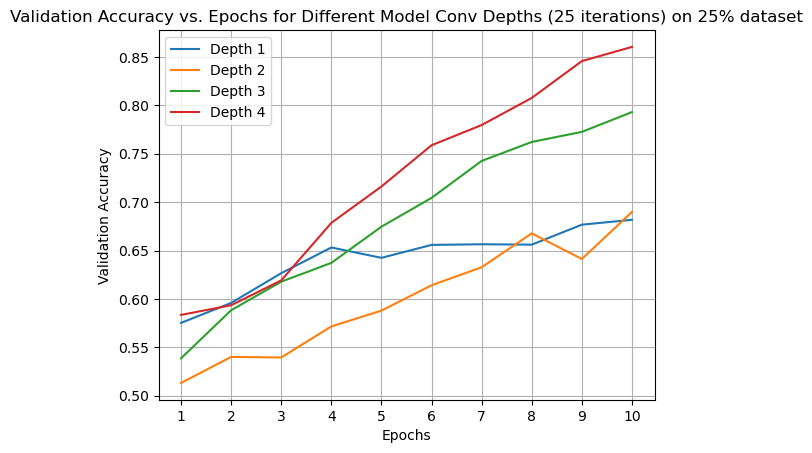

In [11]:
for i, column in enumerate(column_averages):
        plt.plot(np.arange(1, epochs + 1),column, label=f'Depth {i+1}')

plt.xticks(np.arange(1, epochs+1))

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Epochs for Different Model Conv Depths ('+str(iteration)+' iterations) on 25% dataset')
plt.legend()
plt.grid(True)


In [12]:
current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
filename = f"testing records/validation_accuracy_{current_time}.png"
plt.savefig(filename)

<Figure size 640x480 with 0 Axes>